In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from util_functions import process_files, decide_class, get_class_label, plot_confusion_matrix

In [16]:
# PREDICTIONS FROM SAVED MODEL
from keras.models import model_from_json

model_name = 'sound_classifier'

# load json and create model
json_file = open('keras_model_mel/saved_models/' + model_name + '.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('keras_model_mel/saved_models/' + model_name + '.h5')

In [17]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 72, 23, 80)        54800     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 36, 11, 80)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 36, 9, 80)         19280     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 4, 1, 80)          0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 4, 1, 80)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 320)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 1024)              328704    
__________

Mel filters:


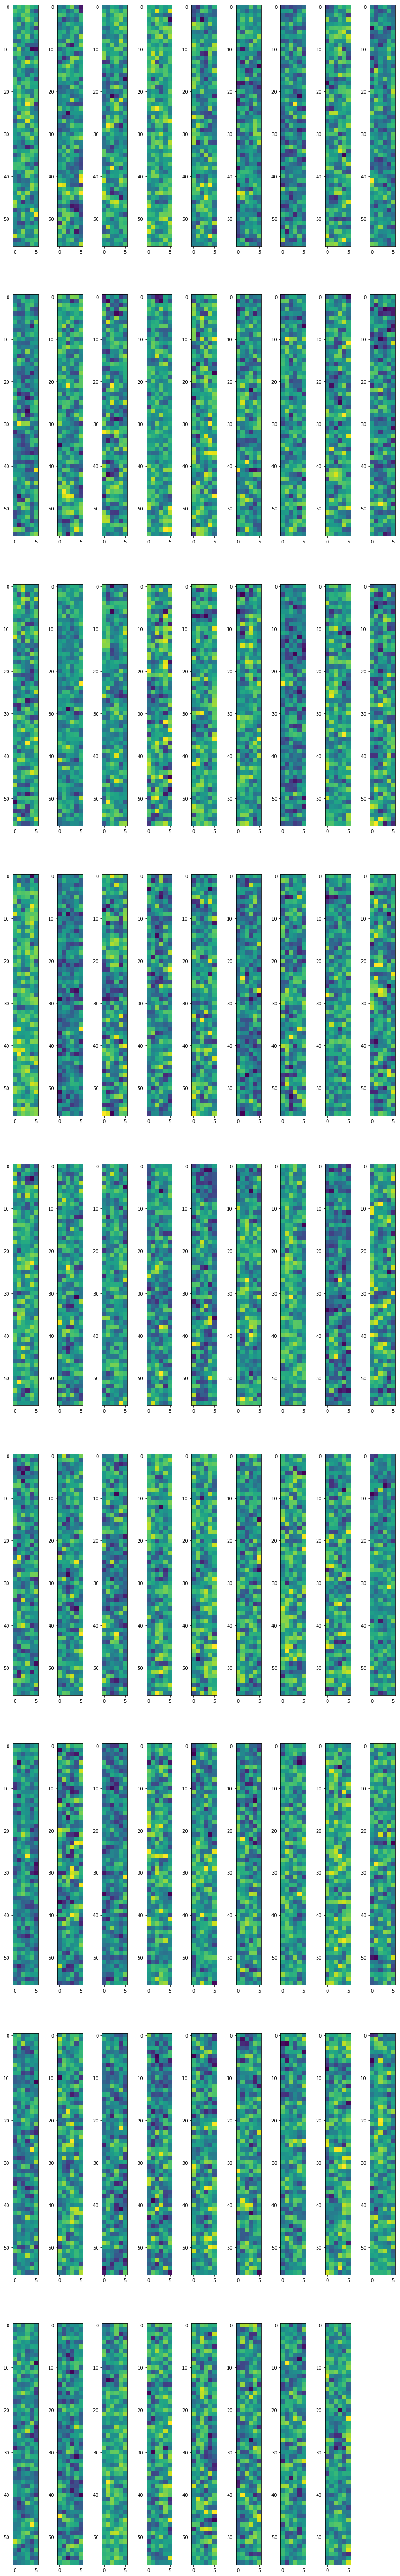

Mel deltas filters:


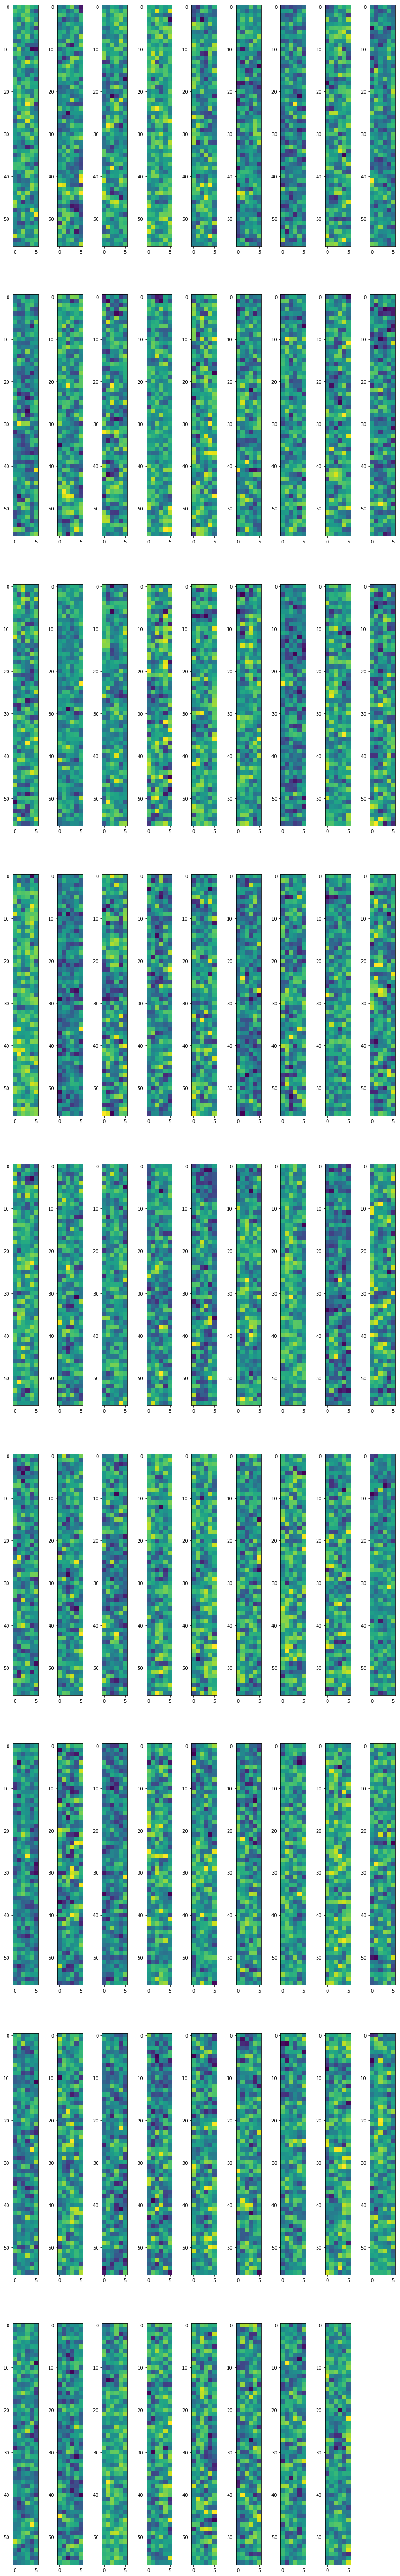

In [36]:
loaded_model.layers

layers_dict = {}

for layer in loaded_model.layers:
    layers_dict[layer.name] = layer.get_weights()

layer = layers_dict['conv2d_37'][0]

print('Mel filters:')
plt.figure(figsize=(15,100))
for f in range(layer[:,:,0,:].shape[2]):  
    filt = layer[:,:,v,f]
    filt = np.reshape(filt, (57, 6))
    plt.subplot(9,9,f+1)
    plt.imshow(filt)
plt.show()

print('Mel deltas filters:')
plt.figure(figsize=(15,100))
for f in range(layer[:,:,1,:].shape[2]):  
    filt = layer[:,:,v,f]
    filt = np.reshape(filt, (57, 6))
    plt.subplot(9,9,f+1)
    plt.imshow(filt)
plt.show()

Mel filters:


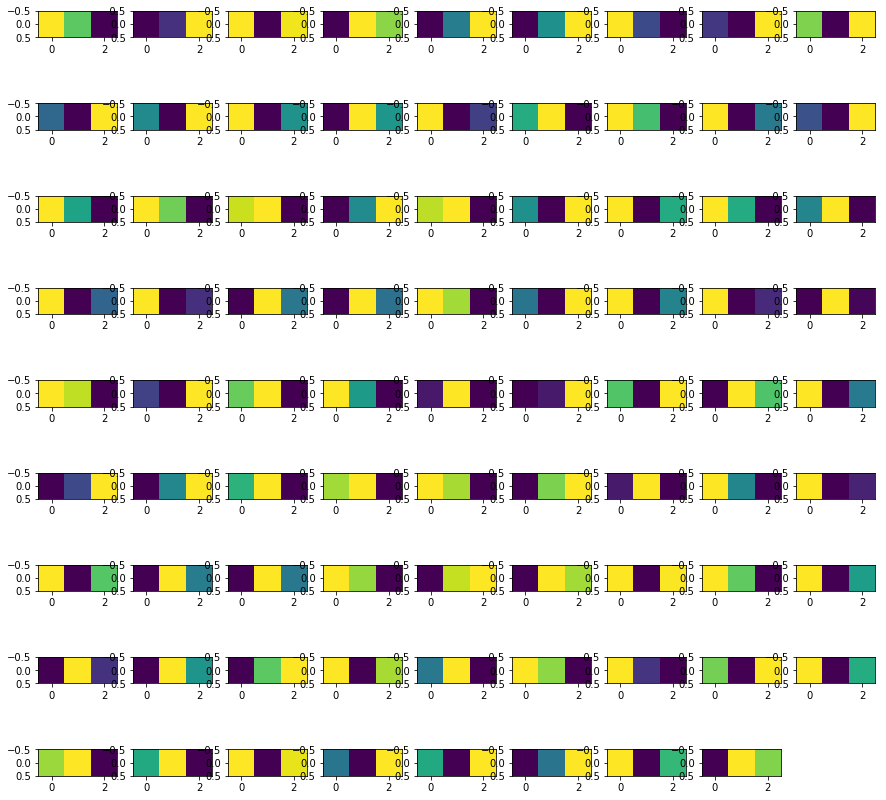

Mel deltas filters:


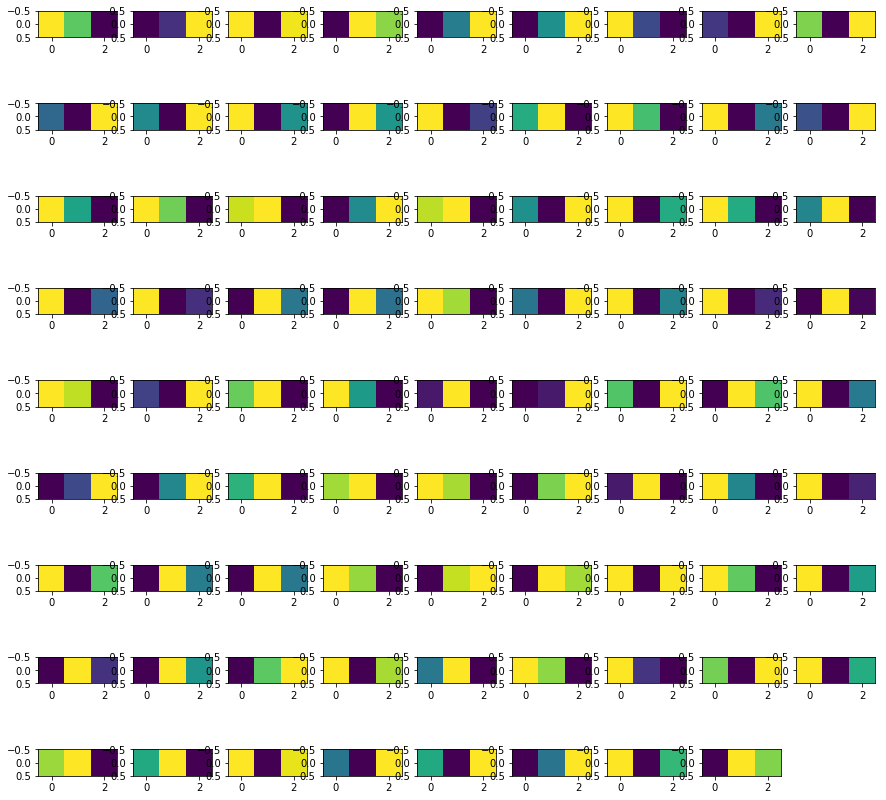

In [46]:
loaded_model.layers

layers_dict = {}

for layer in loaded_model.layers:
    layers_dict[layer.name] = layer.get_weights()

layer = layers_dict['conv2d_38'][0]

print('Mel filters:')
plt.figure(figsize=(15,15))
for f in range(layer[:,:,0,:].shape[2]):  
    filt = layer[:,:,v,f]
    filt = np.reshape(filt, (1, 3))
    plt.subplot(9,9,f+1)
    plt.imshow(filt)
plt.show()

print('Mel deltas filters:')
plt.figure(figsize=(15,15))
for f in range(layer[:,:,1,:].shape[2]):  
    filt = layer[:,:,v,f]
    filt = np.reshape(filt, (1, 3))
    plt.subplot(9,9,f+1)
    plt.imshow(filt)
plt.show()